['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
[[138.         135.66667    127.666664   ...   1.6666666    1.6666666
    0.33333334]
 [ 71.333336    56.          67.666664   ... 247.66667    243.
  238.33333   ]
 [ 84.333336    97.333336    72.333336   ... 114.         194.33333
  241.        ]
 ...
 [ 29.333334    29.          29.333334   ... 145.         147.
  141.66667   ]
 [ 49.333332    55.666668    76.666664   ... 186.33333    176.33333
  161.        ]
 [ 31.          26.333334    28.         ...  34.          42.
   69.666664  ]]


array([[ 1.0050244 ,  0.91436267,  0.6292839 , ..., -1.4910041 ,
        -1.4065766 , -1.3338119 ],
       [-0.41931307, -0.8269849 , -0.714991  , ...,  1.6567609 ,
         1.6757917 ,  1.6750889 ],
       [-0.14156726,  0.07647574, -0.61043614, ..., -0.05361006,
         1.0542091 ,  1.7088021 ],
       ...,
       [-1.3166457 , -1.4171487 , -1.5738331 , ...,  0.3430595 ,
         0.4496563 ,  0.45298648],
       [-0.8893445 , -0.8342708 , -0.5133497 , ...,  0.8719522 ,
         0.8243087 ,  0.69740695],
       [-1.2810373 , -1.4754364 , -1.603706  , ..., -1.0772735 ,
        -0.8914294 , -0.45726934]], dtype=float32)

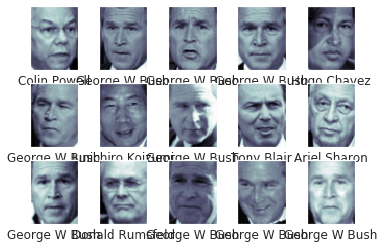

In [15]:
#предварительная обработка данных
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])
    
list_face = []
for fac in faces.images:
    list_face.append(np.ravel(fac))
arr_face = np.array(list_face)
print(arr_face)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(arr_face)
scaled_face = scaler.transform(arr_face)
scaled_face

In [16]:
#создание пустой модели
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
RFC = RandomForestClassifier()

In [31]:
#обучение модели
params = {'n_estimators': [30, 100, 250], 'min_samples_leaf': [5, 10, 15], 'max_depth': [8, 12, 16]}
#params = {'n_estimators': [30, 100], 'min_samples_leaf': [5, 10], 'max_depth': [8, 12]}
model = GridSearchCV(RFC, params, cv = 5, scoring = 'accuracy')
model.fit(scaled_face, faces.target)

/home/petr/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [32]:
#вывод результатов
model.cv_results_

{'mean_fit_time': array([ 1.69824929,  5.25894504, 13.03980412,  1.37360787,  4.4882267 ,
        11.38225808,  1.22341647,  4.14935122, 10.24993939,  1.65777607,
         5.53381519, 13.76273818,  1.39163556,  4.65038595, 11.80118737,
         1.25540252,  4.13194656, 10.38900623,  1.67714405,  5.53242655,
        13.77947464,  1.40695238,  4.65561185, 11.55762424,  1.25705314,
         4.16943555, 10.30010438]),
 'std_fit_time': array([0.01308454, 0.11971066, 0.09448672, 0.02165562, 0.03483896,
        0.17902268, 0.02798489, 0.0566894 , 0.16861879, 0.01988532,
        0.09967124, 0.10581773, 0.02372   , 0.07296184, 0.09465197,
        0.02179485, 0.04636415, 0.19937012, 0.03963543, 0.05406303,
        0.17980325, 0.0247205 , 0.05040735, 0.07612531, 0.01926212,
        0.05559184, 0.06476799]),
 'mean_score_time': array([0.01315651, 0.0316113 , 0.06917195, 0.01033316, 0.02833529,
        0.06645641, 0.00993419, 0.02683306, 0.06431108, 0.01112485,
        0.03034329, 0.07364998, 0.011

In [40]:
print(model.best_params_)
print(model.best_score_)

{'max_depth': 12, 'min_samples_leaf': 5, 'n_estimators': 250}
0.6016320474777448


In [39]:
#красивый вывод результатов
form = '%20s%20s%20s%20s'
print(form % ('max_depth', 'min_samples_leaf', 'n_estimators', 'mean_test_score'))
for num, val in enumerate(model.cv_results_['params']):
    curScore = model.cv_results_['mean_test_score'][num]
    print(form % (val['max_depth'], val['min_samples_leaf'], val['n_estimators'], curScore))
print('Best')
bval = model.best_params_
print(form % (bval['max_depth'], bval['min_samples_leaf'], bval['n_estimators'], model.best_score_))

           max_depth    min_samples_leaf        n_estimators     mean_test_score
                   8                   5                  30  0.5808605341246291
                   8                   5                 100  0.5823442136498517
                   8                   5                 250  0.5919881305637982
                   8                  10                  30  0.5630563798219584
                   8                  10                 100  0.5615727002967359
                   8                  10                 250  0.5623145400593472
                   8                  15                  30  0.5489614243323442
                   8                  15                 100  0.5363501483679525
                   8                  15                 250  0.5370919881305638
                  12                   5                  30  0.5919881305637982
                  12                   5                 100  0.5971810089020771
                  12        

In [3]:
RandomForestClassifier?